## AUTHOR: Matt Fry  mkfry@uncc.edu
### BINF-6112 Final Project:
#### Nucleotide Sequence differences in NC sample to original discovery and related animals
#### presented data ref and displayed https://www.nytimes.com/interactive/2020/04/03/science/coronavirus-genome-bad-news-wrapped-in-protein.html?searchResultPosition=1

#### imports

In [1]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date, datetime

#### functions

In [2]:
def returnTriples(dataSEQ):  #breaks DNA sequence into 3 character item list
    triples = [dataSEQ[i:i+3] for i in range(0, len(dataSEQ), 3)]
    return triples

def returnPartSeq(dataSEQ, start,end):  #function used to break out characters of specific sequence
    partSEQ = dataSEQ[start -1 :end -1]
    return partSEQ

def returnLocinFrame(frame,row, col): # function used to simplify dataframe loc
    return frame.loc[row,col]

def autolabel(rects):  # function used to aid in plotting    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
def savePLTs(plt1,filename,title): # used to export plots to Export folder as PDF
    with PdfPages(filename) as pdf:
        
        pdf.savefig(plt1)
        d = pdf.infodict()
        d['Title'] = title
        d['Author'] = 'MKFRY'
        d['Subject'] = 'ORF1ab gene comparison'
        d['Keywords'] = 'ORF1ab'
        d['CreationDate'] = datetime.today()
        d['ModDate'] = datetime.today()

### Constructed a csv to pull into pandas, this was contained the seq range of genes that make up SARS-CoV2  -- This csv called "genesInCV19.csv" contains these fields:
1. gene -- gene name
2. sample -- refers to location detected
3. start -- start of gene sequence
4. end -- end of the gene sequence
5. charBetweenGenes -- this is the nucleotides between next detected gene
6. genepath -- this is a hyperlink to respective gene on NCBI
7. totlen -- this represents the total length of genome only on first gene record

In [3]:
fh= open("DNAdump/IndSeq/NC_045512.fa")
fh2=open("DNAdump/IndSeq/MT308704.fa")
fh3=open("DNAdump/IndSeq/MN996532_1.fa")
GeneDF = pd.read_csv("genesInCV19.csv")
wuHanDNARec = SeqIO.to_dict(SeqIO.parse(fh,"fasta"))["NC_045512.2"]  # Wuhan Human case
NCDNARec = SeqIO.to_dict(SeqIO.parse(fh2,"fasta"))["MT308704.1"] #NC case
BatDNARec = SeqIO.to_dict(SeqIO.parse(fh3,"fasta"))["MN996532.1"] # Bat with closest relation

In [4]:
GeneDF

,gene,sample,start,end,charsBetweenGenes,genepath,totlen
0,ORF1ab,wuhan,266,21555,9,https://www.ncbi.nlm.nih.gov/gene/43740578,29905.0
1,S,wuhan,21564,25384,9,https://www.ncbi.nlm.nih.gov/gene/43740568,NaN
2,ORF3a,wuhan,25393,26220,25,https://www.ncbi.nlm.nih.gov/gene/43740569,NaN
3,E,wuhan,26245,26472,51,https://www.ncbi.nlm.nih.gov/gene/43740570,NaN
4,M,wuhan,26523,27191,11,https://www.ncbi.nlm.nih.gov/gene/43740571,NaN
5,ORF6,wuhan,27202,27387,7,https://www.ncbi.nlm.nih.gov/gene/43740572,NaN
6,ORF7a,wuhan,27394,27759,-3,https://www.ncbi.nlm.nih.gov/gene/43740573,NaN
7,ORF7b,wuhan,27756,27887,7,https://www.ncbi.nlm.nih.gov/gene/43740574,NaN
8,ORF8,wuhan,27894,28259,15,https://www.ncbi.nlm.nih.gov/gene/43740577,NaN
9,N,wuhan,28274,29533,25,https://www.ncbi.nlm.nih.gov/gene/43740575,NaN


### In addition to the DataFrame created for the genes, I further add columns that supply codons and protien translation from the selected sequence
8. perOfLen  -- how much does this gene compare to total genome
9. raw -- nucleotide seqeunce selected from start to end points 
10. CODONS -- selected sequence broken into 3 nucleotides for translation
11. ProTrans = protien translation from CODON field

In [7]:
GeneDF["perOfLen"]=0.0 #percentage of nucleotides to total
GeneDF["raw"]="na" #selected nucleotide sequence
GeneDF["CODONS"]="na" #codon translation
GeneDF["CODONct"]=0 #codon count
GeneDF["ProTrans"]="na"
for recs in GeneDF.index:  #iteration thru gene dataframe to update
    if GeneDF.loc[recs,"sample"]=="nc":
        
        GeneDF.at[recs,"CODONS"]=returnTriples(NCDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1])
        GeneDF.at[recs,"ProTrans"]=NCDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1].translate()
        GeneDF.at[recs,"raw"]=NCDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1]
        GeneDF.at[recs,"perOfLen"]=(len(GeneDF.loc[recs,"raw"])/len(NCDNARec))*100
    if GeneDF.loc[recs,"sample"]=="wuhan":
        GeneDF.at[recs,"CODONS"]=returnTriples(wuHanDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1])
        GeneDF.at[recs,"ProTrans"]=wuHanDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1].translate()
        GeneDF.at[recs,"raw"]=wuHanDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1]
        GeneDF.at[recs,"perOfLen"]=(len(GeneDF.loc[recs,"raw"])/len(wuHanDNARec))*100
    if GeneDF.loc[recs,"sample"]=="bat":
        GeneDF.at[recs,"CODONS"]=returnTriples(BatDNARec[GeneDF.loc[recs,"start"]+2:GeneDF.loc[recs,"end"]+2])
        GeneDF.at[recs,"ProTrans"]=BatDNARec[GeneDF.loc[recs,"start"]+2:GeneDF.loc[recs,"end"]+2].translate()
        GeneDF.at[recs,"raw"]=BatDNARec[GeneDF.loc[recs,"start"]-1:GeneDF.loc[recs,"end"]-1]
        GeneDF.at[recs,"perOfLen"]=(len(GeneDF.loc[recs,"raw"])/len(BatDNARec))*100
    GeneDF.at[recs, "CODONct"]=len(GeneDF.loc[recs,"CODONS"])

/home/mfry5/.local/lib/python3.7/site-packages/Bio/Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


### Updated display of geneDF

In [8]:
GeneDF

,gene,sample,start,end,charsBetweenGenes,genepath,totlen,perOfLen,raw,CODONS,CODONct,ProTrans
0,ORF1ab,wuhan,266,21555,9,https://www.ncbi.nlm.nih.gov/gene/43740578,29905.0,71.188764,"(A, T, G, G, A, G, A, G, C, C, T, T, G, T, C, ...","[(A, T, G), (G, A, G), (A, G, C), (C, T, T), (...",7097,"(M, E, S, L, V, P, G, F, N, E, K, T, H, V, Q, ..."
1,S,wuhan,21564,25384,9,https://www.ncbi.nlm.nih.gov/gene/43740568,NaN,12.773784,"(T, G, T, T, T, G, T, T, T, T, T, C, T, T, G, ...","[(T, G, T), (T, T, G), (T, T, T), (T, T, C), (...",1274,"(C, L, F, F, L, F, Y, C, H, *, S, L, V, S, V, ..."
2,ORF3a,wuhan,25393,26220,25,https://www.ncbi.nlm.nih.gov/gene/43740569,NaN,2.765424,"(A, T, G, G, A, T, T, T, G, T, T, T, A, T, G, ...","[(A, T, G), (G, A, T), (T, T, G), (T, T, T), (...",276,"(M, D, L, F, M, R, I, F, T, I, G, T, V, T, L, ..."
3,E,wuhan,26245,26472,51,https://www.ncbi.nlm.nih.gov/gene/43740570,NaN,0.759070,"(A, T, G, T, A, C, T, C, A, T, T, C, G, T, T, ...","[(A, T, G), (T, A, C), (T, C, A), (T, T, C), (...",76,"(M, Y, S, F, V, S, E, E, T, G, T, L, I, V, N, ..."
4,M,wuhan,26523,27191,11,https://www.ncbi.nlm.nih.gov/gene/43740571,NaN,2.233740,"(A, T, G, G, C, A, G, A, T, T, C, C, A, A, C, ...","[(A, T, G), (G, C, A), (G, A, T), (T, C, C), (...",223,"(M, A, D, S, N, G, T, I, T, V, E, E, L, K, K, ..."
5,ORF6,wuhan,27202,27387,7,https://www.ncbi.nlm.nih.gov/gene/43740572,NaN,0.618626,"(A, T, G, T, T, T, C, A, T, C, T, C, G, T, T, ...","[(A, T, G), (T, T, T), (C, A, T), (C, T, C), (...",62,"(M, F, H, L, V, D, F, Q, V, T, I, A, E, I, L, ..."
6,ORF7a,wuhan,27394,27759,-3,https://www.ncbi.nlm.nih.gov/gene/43740573,NaN,1.220532,"(A, T, G, A, A, A, A, T, T, A, T, T, C, T, T, ...","[(A, T, G), (A, A, A), (A, T, T), (A, T, T), (...",122,"(M, K, I, I, L, F, L, A, L, I, T, L, A, T, C, ..."
7,ORF7b,wuhan,27756,27887,7,https://www.ncbi.nlm.nih.gov/gene/43740574,NaN,0.438054,"(A, T, G, A, T, T, G, A, A, C, T, T, T, C, A, ...","[(A, T, G), (A, T, T), (G, A, A), (C, T, T), (...",44,"(M, I, E, L, S, L, I, D, F, Y, L, C, F, L, A, ..."
8,ORF8,wuhan,27894,28259,15,https://www.ncbi.nlm.nih.gov/gene/43740577,NaN,1.220532,"(A, T, G, A, A, A, T, T, T, C, T, T, G, T, T, ...","[(A, T, G), (A, A, A), (T, T, T), (C, T, T), (...",122,"(M, K, F, L, V, F, L, G, I, I, T, T, V, A, A, ..."
9,N,wuhan,28274,29533,25,https://www.ncbi.nlm.nih.gov/gene/43740575,NaN,4.209998,"(A, T, G, T, C, T, G, A, T, A, A, T, G, G, A, ...","[(A, T, G), (T, C, T), (G, A, T), (A, A, T), (...",420,"(M, S, D, N, G, P, Q, N, Q, R, N, A, P, R, I, ..."


### Being that I'm only interested in the genes in common within in the 3 sequences I isolate these.

In [9]:
commonGenes=["ORF1ab","S","M","N"]
GeneDF2 = GeneDF[(GeneDF["gene"]=="ORF1ab")|(GeneDF["gene"]=="S")|(GeneDF["gene"]=="M")|(GeneDF["gene"]=="N")]

In [10]:
GeneDF2

,gene,sample,start,end,charsBetweenGenes,genepath,totlen,perOfLen,raw,CODONS,CODONct,ProTrans
0,ORF1ab,wuhan,266,21555,9,https://www.ncbi.nlm.nih.gov/gene/43740578,29905.0,71.188764,"(A, T, G, G, A, G, A, G, C, C, T, T, G, T, C, ...","[(A, T, G), (G, A, G), (A, G, C), (C, T, T), (...",7097,"(M, E, S, L, V, P, G, F, N, E, K, T, H, V, Q, ..."
1,S,wuhan,21564,25384,9,https://www.ncbi.nlm.nih.gov/gene/43740568,NaN,12.773784,"(T, G, T, T, T, G, T, T, T, T, T, C, T, T, G, ...","[(T, G, T), (T, T, G), (T, T, T), (T, T, C), (...",1274,"(C, L, F, F, L, F, Y, C, H, *, S, L, V, S, V, ..."
4,M,wuhan,26523,27191,11,https://www.ncbi.nlm.nih.gov/gene/43740571,NaN,2.233740,"(A, T, G, G, C, A, G, A, T, T, C, C, A, A, C, ...","[(A, T, G), (G, C, A), (G, A, T), (T, C, C), (...",223,"(M, A, D, S, N, G, T, I, T, V, E, E, L, K, K, ..."
9,N,wuhan,28274,29533,25,https://www.ncbi.nlm.nih.gov/gene/43740575,NaN,4.209998,"(A, T, G, T, C, T, G, A, T, A, A, T, G, G, A, ...","[(A, T, G), (T, C, T), (G, A, T), (A, A, T), (...",420,"(M, S, D, N, G, P, Q, N, Q, R, N, A, P, R, I, ..."
11,ORF1ab,nc,241,21530,8,NaN,29835.0,71.355790,"(A, T, G, G, A, G, A, G, C, C, T, T, G, T, C, ...","[(A, T, G), (G, A, G), (A, G, C), (C, T, T), (...",7097,"(M, E, S, L, V, P, G, F, N, E, K, T, H, V, Q, ..."
12,S,nc,21538,25359,9,NaN,NaN,12.807106,"(A, T, G, T, T, T, G, T, T, T, T, T, C, T, T, ...","[(A, T, G), (T, T, T), (G, T, T), (T, T, T), (...",1274,"(M, F, V, F, L, V, L, L, P, L, V, S, S, Q, C, ..."
15,M,nc,26498,27166,11,NaN,NaN,2.238981,"(A, T, G, G, C, A, G, A, T, T, C, C, A, A, C, ...","[(A, T, G), (G, C, A), (G, A, T), (T, C, C), (...",223,"(M, A, D, S, N, G, T, I, T, V, E, E, L, K, K, ..."
20,N,nc,28249,29508,25,NaN,NaN,4.219876,"(A, T, G, T, C, T, G, A, T, A, A, T, G, G, A, ...","[(A, T, G), (T, C, T), (G, A, T), (A, A, T), (...",420,"(M, S, D, N, G, P, Q, N, Q, R, N, A, P, R, I, ..."
22,ORF1ab,bat,251,21537,8,NaN,29855.0,71.297940,"(A, T, G, G, A, G, A, G, C, C, T, T, G, T, C, ...","[(G, A, G), (A, G, C), (C, T, T), (G, T, C), (...",7096,"(E, S, L, V, P, G, F, N, E, K, T, H, V, Q, L, ..."
23,S,bat,21545,25354,9,NaN,NaN,12.758332,"(A, T, G, T, T, T, G, T, T, T, T, T, C, T, T, ...","[(T, T, T), (G, T, T), (T, T, T), (C, T, T), (...",1270,"(F, V, F, L, V, L, L, P, L, V, S, S, Q, C, V, ..."


### From here I start to compare each of the 3 selected samples against each other's respect gene sequence by creating another dataframe to harness the results, using the Wuhan China upload sequence due to the total genome length is greatest...  In this project I'm only working with the ORF1ab gene which is the largest contributer to the genome

In [11]:
WuORF1ab =returnLocinFrame(GeneDF2,0,"raw")
NCORF1ab = returnLocinFrame(GeneDF2,11,"raw")
BatORF1ab = returnLocinFrame(GeneDF2,22,"raw")
CompDF = pd.DataFrame(columns=["BatVal","NCVal","WuhanVal"])
print("WuHan ORF1ab length: "+str(len(WuORF1ab)))
print("NC ORF1ab length: "+str(len(NCORF1ab)))
print("Bat ORF1ab length: "+str(len(BatORF1ab)))

WuHan ORF1ab length: 21289
NC ORF1ab length: 21289
Bat ORF1ab length: 21286


## I signify matches as 0, 1 as different nucleotides, and -1 as missing nucleotide

In [12]:
matchesHuman=0
matchesBat=0
matchesWuToBat=0
matchesNCToBat=0
for k in range(len(WuORF1ab)):
    if NCORF1ab[k] == WuORF1ab[k]:
        matchesHuman+=1
        if k < len(BatORF1ab):
            if WuORF1ab[k]==BatORF1ab[k]:
                matchesBat+=1
                matchesNCToBat+=1
                matchesWuToBat+=1
            else:
                CompDF.at[k,"WuhanVal"]=0
                CompDF.at[k,"BatVal"]=1
                CompDF.at[k,"NCVal"]=0 
        else:
            CompDF.at[k,"WuhanVal"]=0
            CompDF.at[k,"BatVal"]=-1
            CompDF.at[k,"NCVal"]=0
            
    else:
        if k < len(BatORF1ab):
            if WuORF1ab[k]==BatORF1ab[k]:
                matchesWuToBat+=1
                matchesBat+=1
                CompDF.at[k,"WuhanVal"]=0
                CompDF.at[k,"BatVal"]=0
                CompDF.at[k,"NCVal"]=1
            else:
                if NCORF1ab[k]==BatORF1ab[k]:
                    matchesNCToBat+=1
                    matchesBat+=1
                    CompDF.at[k,"WuhanVal"]=1
                    CompDF.at[k,"BatVal"]=0
                    CompDF.at[k,"NCVal"]=0
                else:
                    CompDF.at[k,"WuhanVal"]=1
                    CompDF.at[k,"BatVal"]=1
                    CompDF.at[k,"NCVal"]=1
        else:
            CompDF.at[k,"WuhanVal"]=1
            CompDF.at[k,"BatVal"]=-1
            CompDF.at[k,"NCVal"]=1
print("Bat matches to Wuhan Human sample: "+str(matchesWuToBat)+" of "+str(len(WuORF1ab))+ " char sequence")
print("NC Human Sample matched to Bat sample: "+str(matchesNCToBat) + " of "+ str(len(WuORF1ab))+ " char sequence")
print("Total Human Sample all matched to Bat sample: "+str(matchesBat) + " of "+ str(len(WuORF1ab))+ " char sequence")
print("Total Human Sample matched: "+str(matchesHuman) + " of "+ str(len(WuORF1ab))+ " char sequence")
CompDF
            
            

Bat matches to Wuhan Human sample: 8106 of 21289 char sequence
NC Human Sample matched to Bat sample: 8100 of 21289 char sequence
Total Human Sample all matched to Bat sample: 8107 of 21289 char sequence
Total Human Sample matched: 21270 of 21289 char sequence


,BatVal,NCVal,WuhanVal
59,1,0,0
112,1,0,0
113,1,0,0
176,1,0,0
221,1,0,0
...,...,...,...
21280,1,0,0
21284,1,0,0
21286,-1,0,0
21287,-1,0,0


#### I further breakdown the results in to seperate dataframes...  Mainly interested in differences..

In [13]:
NCdiffDF = CompDF[CompDF["NCVal"] == 1]
WudiffDF = CompDF[(CompDF["WuhanVal"] == 1)]
BatdiffDF = CompDF[(CompDF["BatVal"] == 1)]
TotDiffDF = CompDF[(CompDF["NCVal"] == 1)|(CompDF["BatVal"] == 1)|(CompDF["WuhanVal"] == 1)]
AllvaluesDiffDF = CompDF[(CompDF["NCVal"] == 1)&(CompDF["BatVal"] == 1)& (CompDF["WuhanVal"] == 1)]

NCdiffs = len(NCdiffDF)
Wudiffs = len(WudiffDF)
Batdiffs = len(BatdiffDF)
TotDiffs = len(TotDiffDF)
AllDiffs = len(AllvaluesDiffDF)
print("Compared to the NC sample, there are "+ str(NCdiffs)+ " unique nucleotides")
print("Compared to the Bat sample, there are "+ str(Batdiffs)+ " different nucleotides")
print("The Wuhan has "+ str(Wudiffs)+ " unique nucleotides at 2771")
print("Total there are "+ str(TotDiffs)+ " different nucleotides in relation to the Wuhan Sample most of these being Human to Bat /n the Bat ORF1ab is short "+ str(len(WuORF1ab)-len(BatORF1ab) )+" nucleotides...")
print("There are "+str(AllDiffs) +" cases where all 3 samples are different at a specific position in Gene Sequence")
TotDiffDF

Compared to the NC sample, there are 18 unique nucleotides
Compared to the Bat sample, there are 13179 different nucleotides
The Wuhan has 12 unique nucleotides at 2771
Total there are 13187 different nucleotides in relation to the Wuhan Sample most of these being Human to Bat /n the Bat ORF1ab is short 3 nucleotides...
There are 11 cases where all 3 samples are different at a specific position in Gene Sequence


,BatVal,NCVal,WuhanVal
59,1,0,0
112,1,0,0
113,1,0,0
176,1,0,0
221,1,0,0
...,...,...,...
21275,1,0,0
21278,1,0,0
21279,1,0,0
21280,1,0,0


### This is intersting that 11 of 14 characters are different only between 14221 to 14235

In [14]:
AllvaluesDiffDF

,BatVal,NCVal,WuhanVal
14221,1,1,1
14222,1,1,1
14223,1,1,1
14224,1,1,1
14225,1,1,1
14226,1,1,1
14227,1,1,1
14229,1,1,1
14233,1,1,1
14234,1,1,1


### Another intersting finding is that only 1 nucleotide from NC is equal to the Bat and not Wuhan sample...  Visible from the Wuhan Difference data frame @ position 2771

In [15]:
WudiffDF

,BatVal,NCVal,WuhanVal
2771,0,0,1
14221,1,1,1
14222,1,1,1
14223,1,1,1
14224,1,1,1
14225,1,1,1
14226,1,1,1
14227,1,1,1
14229,1,1,1
14233,1,1,1


### The particular range between 14221 and 14235 I want to try to display in a graph, so I create another dataframe to harness the Transposed records...

#### by determinig the positions in the Sequnces that don't match in relation to the ORF1ab gene, i want to extract those nucleotides, and condons possibly...


In [16]:
#pltDF = AllvaluesDiffDF.T
pltDF = pd.DataFrame(WuORF1ab[14221:14235])
pltDF = pltDF.T
pltDF["sample"] = "WuhanVal"
pltDF=pltDF.set_index("sample")
pltDF.loc["NCVal"] =NCORF1ab[14221:14235]    # I want to capture all the nucleotides since 11 of 14 are different
pltDF.loc["BatVal"] =BatORF1ab[14221:14235]  # I also want to see where they are the same

In [15]:
pltDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
sample,,,,,,,,,,,,,,
WuhanVal,A,G,A,G,C,T,A,G,G,T,G,T,T,G
NCVal,N,N,N,N,N,N,N,N,N,N,N,N,N,N
BatVal,G,C,T,A,G,G,T,G,T,T,G,T,A,C


### Now we disply this showing the Range, the ORF1ab heading, and plot results.  By this looks of this dataframe, NC is just containing "N". 

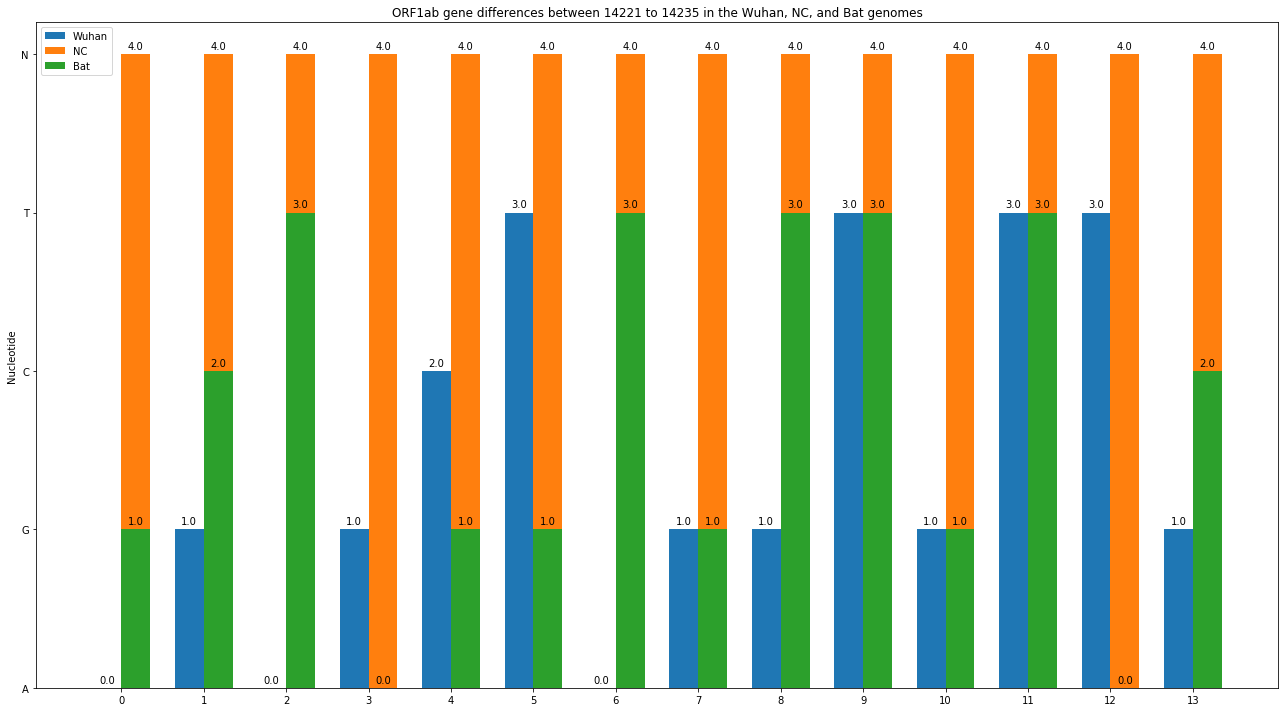

In [16]:

labels = pltDF.columns
wuD = pltDF.iloc[0,:]
NCD = pltDF.iloc[1,:]
BatD = pltDF.iloc[2,:]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize =(18,10) )


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nucleotide')
ax.set_title('ORF1ab gene differences between 14221 to 14235 in the Wuhan, NC, and Bat genomes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
rects1 = ax.bar(x - width/2, wuD, width, label='Wuhan')
rects2 = ax.bar(x + width/2,NCD, width, label='NC')
rects3 = ax.bar(x + width/2, BatD, width, label='Bat')
ax.legend()
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
myPLT = fig
plt.show()


### Nucleotides are replaced with a numeric values in reation to label values, I'm further exporting the graph to display as a PDF

In [18]:
savePLTs(myPLT,"Exports/ORF1ab_analysis.pdf","ORF1ab In Wu,NC,Bat")